In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

1. Importing the data from the csv file and reading it as pandas dataframe

In [3]:
data = pd.read_csv("project1_data.csv")

In [4]:
data.head()

,age,job,marital,education,balance,housing,loan,y
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44900 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   y          45197 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


2. Checking all the null values in the dataset 

In [6]:
for col_name in data.columns:
    print('Column ', col_name, ' has: ', data[col_name].isna().sum(), ' missing values.')

Column  age  has:  0  missing values.
Column  job  has:  311  missing values.
Column  marital  has:  0  missing values.
Column  education  has:  0  missing values.
Column  balance  has:  0  missing values.
Column  housing  has:  0  missing values.
Column  loan  has:  0  missing values.
Column  y  has:  14  missing values.



variables 'job' and target variable 'y' has missing values. 

  a. For 'job' we will impute the 311 missing values with mode as it a categorical variable

  b. For 'y' as it a target variable (dont want to impute target variable) and has only 14 missing values we will remove the null values data. 

In [7]:
data['job'].value_counts()

blue-collar      9674
management       9380
technician       7551
admin.           5135
services         4125
retired          2245
self-employed    1566
entrepreneur     1480
unemployed       1293
housemaid        1235
student           933
unknown           283
Name: job, dtype: int64

In [8]:
data['job'] = data['job'].fillna('blue-collar')

In [9]:
data.isnull().sum()/len(data) 

age          0.00000
job          0.00000
marital      0.00000
education    0.00000
balance      0.00000
housing      0.00000
loan         0.00000
y            0.00031
dtype: float64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()/len(data) 

age          0.0
job          0.0
marital      0.0
education    0.0
balance      0.0
housing      0.0
loan         0.0
y            0.0
dtype: float64

In [12]:
data.describe(include='all')

,age,job,marital,education,balance,housing,loan,y
count,45197.000000,45197,45197,45197,45197.000000,45197,45197,45197
unique,NaN,12,3,4,NaN,2,2,2
top,NaN,blue-collar,married,secondary,NaN,yes,no,no
freq,NaN,9982,27206,23192,NaN,25120,37955,39909
mean,40.864770,NaN,NaN,NaN,1311.152997,NaN,NaN,NaN
std,10.750966,NaN,NaN,NaN,3807.483417,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-99999.000000,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,72.000000,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,448.000000,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,1427.000000,NaN,NaN,NaN


3. From the data description the min value for age is 0 but we dont need the data where age is below 18 as it is not relavent to describe target variable, we will analyse the data where age is greater than equal to 18

In [13]:
data = data[data['age'] >= 18] 

In [14]:
num_vars = ['age', 'balance']
cat_vars = ['job', 'marital', 'education', 'housing', 'loan']
target = 'y'

In [15]:
data[num_vars].describe()

,age,balance
count,45116.000000,45116.000000
mean,40.938137,1310.821039
std,10.620132,3806.377071
min,18.000000,-99999.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.250000
max,95.000000,102127.000000


7. Encode the target column (y) as 0 (no) and 1 (yes)

In [16]:
data['y'] = data['y'].map(dict(yes=1, no=0))

4. Split the data into a train (80%) and test (20%) set

In [17]:
X = data[num_vars + cat_vars]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [18]:
for cat_col_name in cat_vars:    
    print(X_train[cat_col_name].value_counts())

blue-collar      8029
management       7506
technician       6077
admin.           4066
services         3249
retired          1791
self-employed    1242
entrepreneur     1175
unemployed       1023
housemaid         993
student           719
unknown           222
Name: job, dtype: int64
married     21756
single      10162
divorced     4174
Name: marital, dtype: int64
secondary    18576
tertiary     10571
primary       5473
unknown       1472
Name: education, dtype: int64
yes    20054
no     16038
Name: housing, dtype: int64
no     30304
yes     5788
Name: loan, dtype: int64


In [19]:
X_train[num_vars].describe()

,age,balance
count,36092.000000,36092.000000
mean,40.965643,1326.748061
std,10.605102,3759.643973
min,18.000000,-99999.000000
25%,33.000000,72.000000
50%,39.000000,452.000000
75%,48.000000,1445.000000
max,95.000000,98417.000000


5. As per the EDA, age seems to be reasonable with average age of 40 years but the balance mean is just 1312 which doesnt look good, may be due to huge negative balance (-99999) values as minimun.

6. Appropriately encode the categorical feature variables

In [20]:
X_train_dummied = pd.get_dummies(X_train, columns=cat_vars)

In [21]:
X_test_dummied = pd.get_dummies(X_test, columns=cat_vars)

In [22]:
X_train_dummied.transpose().head(100)

,8756,6168,19308,12173,40339,30444,17356,21110,33882,9667,...,20099,14475,8055,42133,29120,23389,11885,27115,8382,17563
age,60,31,60,41,34,45,34,43,29,59,...,32,37,31,36,26,46,43,43,33,48
balance,1664,4388,957,387,443,925,262,2616,78,3237,...,212,0,298,506,376,68,177,5347,34,5176
job_admin.,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
job_blue-collar,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
job_entrepreneur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
job_housemaid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
job_management,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
job_retired,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
job_self-employed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
job_services,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


8. Calculate the prevalence (class balance) of the target

In [23]:
y_count = data['y'].value_counts()
y_count

0    39839
1     5277
Name: y, dtype: int64

In [24]:
y_count[1] / (y_count[0] + y_count[1]) #prevalence (class balance) of the target

0.11696515648550404

9. Fit a logistic regression model on the training set.

In [25]:
log_reg = LogisticRegression(random_state=4)
result = log_reg.fit(X_train_dummied, y_train)

10. Use your model to generate probability predictions on the test set. 

In [26]:
preds = log_reg.predict_proba(X_test_dummied)

11. Calcuate the area under the ROC curve of your predictions on the test set.

In [27]:
roc_auc_score(y_test, preds[:,1])

0.632140811240298

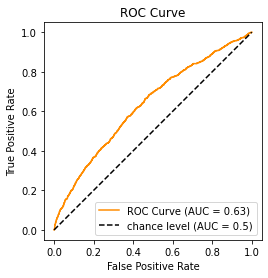

In [28]:
RocCurveDisplay.from_predictions(
    y_test,
    preds[:, 1],
    name='ROC Curve',
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

12. Choose an appropriate decision threshold and create class predictions for your model on the test set.
13. Produce a confusion matrix for your class predictions.

In [34]:
confusion_matrix(y_test, pd.Series([1 if x > 0.5 else 0 for x in preds[:,1]]))

array([[7944,    3],
       [1077,    0]], dtype=int64)

Overall not a good model, but the model is relatively good quality at predicting "no" values of the target values but very poor at predicting when client is subcribed to term deposit ("yes" value for target variable).

Business stackholders can use the model to decide when clients doesnt subcribe for term ("no" value of target variable)

variables like balance and job type can be most significant to determmine the target veraible. 